In [0]:
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = "{}{}-{}".format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = "cu80" if path.exists("/opt/bin/nvidia-smi") else "cpu"

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch

In [261]:
!pip install Pillow==4.0.0
!pip install image

  Using cached Pillow-4.0.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 5.0.0
    Uninstalling Pillow-5.0.0:
      Successfully uninstalled Pillow-5.0.0


In [0]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST

from sklearn import metrics

In [0]:
RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed_all(RANDOM_SEED)

EPOCHS_TO_TRAIN = 20

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

sns.set(style="whitegrid", palette="muted", font_scale=1.5)

rcParams["figure.figsize"] = 12, 8

In [0]:
!mkdir -p data

In [267]:
!wget http://files.fast.ai/data/cifar10.tgz

--2018-03-08 15:33:49--  http://files.fast.ai/data/cifar10.tgz
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168168549 (160M) [text/plain]
Saving to: ‘cifar10.tgz.6’

cifar10.tgz.6       100%[===================>] 160.38M  36.5MB/s    in 4.9s    

2018-03-08 15:33:54 (32.8 MB/s) - ‘cifar10.tgz.6’ saved [168168549/168168549]



In [268]:
!tar -xvzf cifar10.tgz -C data/

cifar10/
cifar10/labels.txt
cifar10/test/
cifar10/test/deer/
cifar10/test/deer/5505_deer.png
cifar10/test/deer/441_deer.png
cifar10/test/deer/3053_deer.png
cifar10/test/deer/365_deer.png
cifar10/test/deer/1345_deer.png
cifar10/test/deer/7188_deer.png
cifar10/test/deer/4448_deer.png
cifar10/test/deer/9690_deer.png
cifar10/test/deer/9073_deer.png
cifar10/test/deer/889_deer.png
cifar10/test/deer/5670_deer.png
cifar10/test/deer/5933_deer.png
cifar10/test/deer/4717_deer.png
cifar10/test/deer/797_deer.png
cifar10/test/deer/4357_deer.png
cifar10/test/deer/8836_deer.png
cifar10/test/deer/2032_deer.png
cifar10/test/deer/5289_deer.png
cifar10/test/deer/8566_deer.png
cifar10/test/deer/1910_deer.png
cifar10/test/deer/9429_deer.png
cifar10/test/deer/3708_deer.png
cifar10/test/deer/6108_deer.png
cifar10/test/deer/8842_deer.png
cifar10/test/deer/1293_deer.png
cifar10/test/deer/773_deer.png
cifar10/test/deer/117_deer.png
cifar10/test/deer/1300_deer.png
cifar10/test/deer/8071_deer.png
cifar10/test/deer

cifar10/test/bird/123_bird.png
cifar10/test/bird/409_bird.png
cifar10/test/bird/1581_bird.png
cifar10/test/bird/9475_bird.png
cifar10/test/bird/9381_bird.png
cifar10/test/bird/9039_bird.png
cifar10/test/bird/837_bird.png
cifar10/test/bird/1456_bird.png
cifar10/test/bird/5514_bird.png
cifar10/test/bird/6768_bird.png
cifar10/test/bird/2883_bird.png
cifar10/test/bird/8845_bird.png
cifar10/test/bird/4414_bird.png
cifar10/test/bird/8040_bird.png
cifar10/test/bird/2331_bird.png
cifar10/test/bird/1846_bird.png
cifar10/test/bird/1110_bird.png
cifar10/test/bird/1277_bird.png
cifar10/test/bird/6773_bird.png
cifar10/test/bird/4565_bird.png
cifar10/test/bird/4366_bird.png
cifar10/test/bird/1723_bird.png
cifar10/test/bird/5910_bird.png
cifar10/test/bird/4074_bird.png
cifar10/test/bird/9070_bird.png
cifar10/test/bird/2123_bird.png
cifar10/test/bird/3428_bird.png
cifar10/test/bird/2985_bird.png
cifar10/test/bird/1481_bird.png
cifar10/test/bird/6512_bird.png
cifar10/test/bird/5275_bird.png
cifar10/tes

cifar10/test/dog/1901_dog.png
cifar10/test/dog/3355_dog.png
cifar10/test/dog/3045_dog.png
cifar10/test/dog/5976_dog.png
cifar10/test/dog/4182_dog.png
cifar10/test/dog/2803_dog.png
cifar10/test/dog/7668_dog.png
cifar10/test/dog/4069_dog.png
cifar10/test/dog/4849_dog.png
cifar10/test/dog/3142_dog.png
cifar10/test/dog/3709_dog.png
cifar10/test/dog/699_dog.png
cifar10/test/dog/2479_dog.png
cifar10/test/dog/178_dog.png
cifar10/test/dog/1385_dog.png
cifar10/test/dog/239_dog.png
cifar10/test/dog/2915_dog.png
cifar10/test/dog/6608_dog.png
cifar10/test/dog/39_dog.png
cifar10/test/dog/5552_dog.png
cifar10/test/dog/2057_dog.png
cifar10/test/dog/6072_dog.png
cifar10/test/dog/1362_dog.png
cifar10/test/dog/3424_dog.png
cifar10/test/dog/8789_dog.png
cifar10/test/dog/8317_dog.png
cifar10/test/dog/9993_dog.png
cifar10/test/dog/9804_dog.png
cifar10/test/dog/1649_dog.png
cifar10/test/dog/3200_dog.png
cifar10/test/dog/3909_dog.png
cifar10/test/dog/9575_dog.png
cifar10/test/dog/9305_dog.png
cifar10/test/do

cifar10/test/automobile/6417_automobile.png
cifar10/test/automobile/619_automobile.png
cifar10/test/automobile/7535_automobile.png
cifar10/test/automobile/1751_automobile.png
cifar10/test/automobile/5409_automobile.png
cifar10/test/automobile/8813_automobile.png
cifar10/test/automobile/4713_automobile.png
cifar10/test/automobile/5394_automobile.png
cifar10/test/automobile/3449_automobile.png
cifar10/test/automobile/5697_automobile.png
cifar10/test/automobile/2345_automobile.png
cifar10/test/automobile/9601_automobile.png
cifar10/test/automobile/5378_automobile.png
cifar10/test/automobile/8955_automobile.png
cifar10/test/automobile/6555_automobile.png
cifar10/test/automobile/161_automobile.png
cifar10/test/automobile/6817_automobile.png
cifar10/test/automobile/8455_automobile.png
cifar10/test/automobile/961_automobile.png
cifar10/test/automobile/7225_automobile.png
cifar10/test/automobile/7674_automobile.png
cifar10/test/automobile/1156_automobile.png
cifar10/test/automobile/7532_automo

cifar10/test/ship/9472_ship.png
cifar10/test/ship/2935_ship.png
cifar10/test/ship/3519_ship.png
cifar10/test/ship/1205_ship.png
cifar10/test/ship/1263_ship.png
cifar10/test/ship/3037_ship.png
cifar10/test/ship/1122_ship.png
cifar10/test/ship/4370_ship.png
cifar10/test/ship/5088_ship.png
cifar10/test/ship/6124_ship.png
cifar10/test/ship/8339_ship.png
cifar10/test/ship/6490_ship.png
cifar10/test/ship/7088_ship.png
cifar10/test/ship/8311_ship.png
cifar10/test/ship/5138_ship.png
cifar10/test/ship/9476_ship.png
cifar10/test/ship/7949_ship.png
cifar10/test/ship/6998_ship.png
cifar10/test/ship/2052_ship.png
cifar10/test/ship/3089_ship.png
cifar10/test/ship/5277_ship.png
cifar10/test/ship/4910_ship.png
cifar10/test/ship/2721_ship.png
cifar10/test/ship/2014_ship.png
cifar10/test/ship/3106_ship.png
cifar10/test/ship/2421_ship.png
cifar10/test/ship/4455_ship.png
cifar10/test/ship/6468_ship.png
cifar10/test/ship/2687_ship.png
cifar10/test/ship/9158_ship.png
cifar10/test/ship/218_ship.png
cifar10/t

cifar10/test/frog/162_frog.png
cifar10/test/frog/413_frog.png
cifar10/test/frog/5476_frog.png
cifar10/test/frog/4413_frog.png
cifar10/test/frog/9224_frog.png
cifar10/test/frog/41_frog.png
cifar10/test/frog/7891_frog.png
cifar10/test/frog/8613_frog.png
cifar10/test/frog/1753_frog.png
cifar10/test/frog/8392_frog.png
cifar10/test/frog/9550_frog.png
cifar10/test/frog/2299_frog.png
cifar10/test/frog/7301_frog.png
cifar10/test/frog/1418_frog.png
cifar10/test/frog/5111_frog.png
cifar10/test/frog/5889_frog.png
cifar10/test/frog/6487_frog.png
cifar10/test/frog/107_frog.png
cifar10/test/frog/9531_frog.png
cifar10/test/frog/901_frog.png
cifar10/test/frog/6192_frog.png
cifar10/test/frog/3088_frog.png
cifar10/test/frog/635_frog.png
cifar10/test/frog/3435_frog.png
cifar10/test/frog/1140_frog.png
cifar10/test/frog/2024_frog.png
cifar10/test/frog/62_frog.png
cifar10/test/frog/3442_frog.png
cifar10/test/frog/9251_frog.png
cifar10/test/frog/3015_frog.png
cifar10/test/frog/6911_frog.png
cifar10/test/frog

cifar10/test/truck/7058_truck.png
cifar10/test/truck/2873_truck.png
cifar10/test/truck/2793_truck.png
cifar10/test/truck/4815_truck.png
cifar10/test/truck/9085_truck.png
cifar10/test/truck/626_truck.png
cifar10/test/truck/2907_truck.png
cifar10/test/truck/2714_truck.png
cifar10/test/truck/6176_truck.png
cifar10/test/truck/5291_truck.png
cifar10/test/truck/9096_truck.png
cifar10/test/truck/89_truck.png
cifar10/test/truck/9754_truck.png
cifar10/test/truck/719_truck.png
cifar10/test/truck/3542_truck.png
cifar10/test/truck/2514_truck.png
cifar10/test/truck/9324_truck.png
cifar10/test/truck/2019_truck.png
cifar10/test/truck/507_truck.png
cifar10/test/truck/1987_truck.png
cifar10/test/truck/8615_truck.png
cifar10/test/truck/780_truck.png
cifar10/test/truck/1487_truck.png
cifar10/test/truck/451_truck.png
cifar10/test/truck/5967_truck.png
cifar10/test/truck/504_truck.png
cifar10/test/truck/1927_truck.png
cifar10/test/truck/8830_truck.png
cifar10/test/truck/733_truck.png
cifar10/test/truck/7883

cifar10/test/horse/4076_horse.png
cifar10/test/horse/7611_horse.png
cifar10/test/horse/2440_horse.png
cifar10/test/horse/9723_horse.png
cifar10/test/horse/3060_horse.png
cifar10/test/horse/2881_horse.png
cifar10/test/horse/2358_horse.png
cifar10/test/horse/4289_horse.png
cifar10/test/horse/8722_horse.png
cifar10/test/horse/6448_horse.png
cifar10/test/horse/7078_horse.png
cifar10/test/horse/3920_horse.png
cifar10/test/horse/8587_horse.png
cifar10/test/horse/8029_horse.png
cifar10/test/horse/8718_horse.png
cifar10/test/horse/5247_horse.png
cifar10/test/horse/9020_horse.png
cifar10/test/horse/7751_horse.png
cifar10/test/horse/9313_horse.png
cifar10/test/horse/9428_horse.png
cifar10/test/horse/6478_horse.png
cifar10/test/horse/7070_horse.png
cifar10/test/horse/4240_horse.png
cifar10/test/horse/9468_horse.png
cifar10/test/horse/2470_horse.png
cifar10/test/horse/2615_horse.png
cifar10/test/horse/57_horse.png
cifar10/test/horse/7426_horse.png
cifar10/test/horse/9923_horse.png
cifar10/test/hor

cifar10/test/cat/5754_cat.png
cifar10/test/cat/6393_cat.png
cifar10/test/cat/7415_cat.png
cifar10/test/cat/5268_cat.png
cifar10/test/cat/8343_cat.png
cifar10/test/cat/4559_cat.png
cifar10/test/cat/5655_cat.png
cifar10/test/cat/1552_cat.png
cifar10/test/cat/3413_cat.png
cifar10/test/cat/7313_cat.png
cifar10/test/cat/995_cat.png
cifar10/test/cat/4864_cat.png
cifar10/test/cat/7885_cat.png
cifar10/test/cat/3634_cat.png
cifar10/test/cat/8033_cat.png
cifar10/test/cat/205_cat.png
cifar10/test/cat/2822_cat.png
cifar10/test/cat/5835_cat.png
cifar10/test/cat/438_cat.png
cifar10/test/cat/3575_cat.png
cifar10/test/cat/4643_cat.png
cifar10/test/cat/8680_cat.png
cifar10/test/cat/9578_cat.png
cifar10/test/cat/825_cat.png
cifar10/test/cat/5361_cat.png
cifar10/test/cat/53_cat.png
cifar10/test/cat/3259_cat.png
cifar10/test/cat/7210_cat.png
cifar10/test/cat/1775_cat.png
cifar10/test/cat/176_cat.png
cifar10/test/cat/5530_cat.png
cifar10/test/cat/5381_cat.png
cifar10/test/cat/271_cat.png
cifar10/test/cat/5

cifar10/train/deer/28903_deer.png
cifar10/train/deer/30008_deer.png
cifar10/train/deer/42700_deer.png
cifar10/train/deer/5214_deer.png
cifar10/train/deer/48143_deer.png
cifar10/train/deer/14324_deer.png
cifar10/train/deer/12160_deer.png
cifar10/train/deer/28084_deer.png
cifar10/train/deer/14359_deer.png
cifar10/train/deer/26781_deer.png
cifar10/train/deer/38103_deer.png
cifar10/train/deer/10707_deer.png
cifar10/train/deer/5570_deer.png
cifar10/train/deer/45408_deer.png
cifar10/train/deer/16749_deer.png
cifar10/train/deer/16951_deer.png
cifar10/train/deer/43746_deer.png
cifar10/train/deer/30442_deer.png
cifar10/train/deer/15909_deer.png
cifar10/train/deer/11871_deer.png
cifar10/train/deer/22369_deer.png
cifar10/train/deer/25351_deer.png
cifar10/train/deer/36234_deer.png
cifar10/train/deer/49727_deer.png
cifar10/train/deer/28200_deer.png
cifar10/train/deer/7097_deer.png
cifar10/train/deer/16195_deer.png
cifar10/train/deer/43238_deer.png
cifar10/train/deer/40665_deer.png
cifar10/train/dee

cifar10/train/deer/33185_deer.png
cifar10/train/deer/43926_deer.png
cifar10/train/deer/30449_deer.png
cifar10/train/deer/27801_deer.png
cifar10/train/deer/28881_deer.png
cifar10/train/deer/21781_deer.png
cifar10/train/deer/18060_deer.png
cifar10/train/deer/27227_deer.png
cifar10/train/deer/29240_deer.png
cifar10/train/deer/17338_deer.png
cifar10/train/deer/41737_deer.png
cifar10/train/deer/14490_deer.png
cifar10/train/deer/40111_deer.png
cifar10/train/deer/40167_deer.png
cifar10/train/deer/36336_deer.png
cifar10/train/deer/28485_deer.png
cifar10/train/deer/22185_deer.png
cifar10/train/deer/8137_deer.png
cifar10/train/deer/7394_deer.png
cifar10/train/deer/21788_deer.png
cifar10/train/deer/21949_deer.png
cifar10/train/deer/45668_deer.png
cifar10/train/deer/2069_deer.png
cifar10/train/deer/42442_deer.png
cifar10/train/deer/35397_deer.png
cifar10/train/deer/25435_deer.png
cifar10/train/deer/49597_deer.png
cifar10/train/deer/37507_deer.png
cifar10/train/deer/42486_deer.png
cifar10/train/dee

cifar10/train/deer/27063_deer.png
cifar10/train/deer/21052_deer.png
cifar10/train/deer/21771_deer.png
cifar10/train/deer/24861_deer.png
cifar10/train/deer/38584_deer.png
cifar10/train/deer/19822_deer.png
cifar10/train/deer/14853_deer.png
cifar10/train/deer/27429_deer.png
cifar10/train/deer/43364_deer.png
cifar10/train/deer/10838_deer.png
cifar10/train/deer/2943_deer.png
cifar10/train/deer/20782_deer.png
cifar10/train/deer/17049_deer.png
cifar10/train/deer/34038_deer.png
cifar10/train/deer/17078_deer.png
cifar10/train/deer/36992_deer.png
cifar10/train/deer/296_deer.png
cifar10/train/deer/24630_deer.png
cifar10/train/deer/11765_deer.png
cifar10/train/deer/158_deer.png
cifar10/train/deer/13646_deer.png
cifar10/train/deer/33245_deer.png
cifar10/train/deer/8114_deer.png
cifar10/train/deer/44761_deer.png
cifar10/train/deer/1889_deer.png
cifar10/train/deer/9049_deer.png
cifar10/train/deer/21684_deer.png
cifar10/train/deer/39344_deer.png
cifar10/train/deer/30044_deer.png
cifar10/train/deer/351

cifar10/train/deer/19684_deer.png
cifar10/train/deer/9618_deer.png
cifar10/train/deer/3908_deer.png
cifar10/train/deer/40210_deer.png
cifar10/train/deer/33253_deer.png
cifar10/train/deer/14911_deer.png
cifar10/train/deer/37942_deer.png
cifar10/train/deer/14385_deer.png
cifar10/train/deer/18142_deer.png
cifar10/train/deer/32523_deer.png
cifar10/train/deer/26978_deer.png
cifar10/train/deer/41263_deer.png
cifar10/train/deer/34680_deer.png
cifar10/train/deer/20049_deer.png
cifar10/train/deer/2576_deer.png
cifar10/train/deer/37577_deer.png
cifar10/train/deer/15919_deer.png
cifar10/train/deer/37987_deer.png
cifar10/train/deer/46036_deer.png
cifar10/train/deer/28072_deer.png
cifar10/train/deer/27139_deer.png
cifar10/train/deer/528_deer.png
cifar10/train/deer/22498_deer.png
cifar10/train/deer/25863_deer.png
cifar10/train/deer/20306_deer.png
cifar10/train/deer/28315_deer.png
cifar10/train/deer/33673_deer.png
cifar10/train/deer/32224_deer.png
cifar10/train/deer/20629_deer.png
cifar10/train/deer/

cifar10/train/bird/37941_bird.png
cifar10/train/bird/30893_bird.png
cifar10/train/bird/46813_bird.png
cifar10/train/bird/31759_bird.png
cifar10/train/bird/36710_bird.png
cifar10/train/bird/36116_bird.png
cifar10/train/bird/30628_bird.png
cifar10/train/bird/35677_bird.png
cifar10/train/bird/43421_bird.png
cifar10/train/bird/37549_bird.png
cifar10/train/bird/21491_bird.png
cifar10/train/bird/14327_bird.png
cifar10/train/bird/16747_bird.png
cifar10/train/bird/24978_bird.png
cifar10/train/bird/20260_bird.png
cifar10/train/bird/33881_bird.png
cifar10/train/bird/37128_bird.png
cifar10/train/bird/7696_bird.png
cifar10/train/bird/7038_bird.png
cifar10/train/bird/10594_bird.png
cifar10/train/bird/2816_bird.png
cifar10/train/bird/5535_bird.png
cifar10/train/bird/41562_bird.png
cifar10/train/bird/11194_bird.png
cifar10/train/bird/11961_bird.png
cifar10/train/bird/48288_bird.png
cifar10/train/bird/7853_bird.png
cifar10/train/bird/30239_bird.png
cifar10/train/bird/13819_bird.png
cifar10/train/bird/

cifar10/train/bird/12724_bird.png
cifar10/train/bird/13492_bird.png
cifar10/train/bird/21426_bird.png
cifar10/train/bird/6227_bird.png
cifar10/train/bird/29220_bird.png
cifar10/train/bird/26442_bird.png
cifar10/train/bird/42147_bird.png
cifar10/train/bird/30894_bird.png
cifar10/train/bird/43930_bird.png
cifar10/train/bird/24576_bird.png
cifar10/train/bird/30988_bird.png
cifar10/train/bird/57_bird.png
cifar10/train/bird/48388_bird.png
cifar10/train/bird/19213_bird.png
cifar10/train/bird/4634_bird.png
cifar10/train/bird/37856_bird.png
cifar10/train/bird/45079_bird.png
cifar10/train/bird/22331_bird.png
cifar10/train/bird/40714_bird.png
cifar10/train/bird/33263_bird.png
cifar10/train/bird/709_bird.png
cifar10/train/bird/27253_bird.png
cifar10/train/bird/20284_bird.png
cifar10/train/bird/1670_bird.png
cifar10/train/bird/9558_bird.png
cifar10/train/bird/37742_bird.png
cifar10/train/bird/38488_bird.png
cifar10/train/bird/8482_bird.png
cifar10/train/bird/21139_bird.png
cifar10/train/bird/18674

cifar10/train/bird/34769_bird.png
cifar10/train/bird/33103_bird.png
cifar10/train/bird/5012_bird.png
cifar10/train/bird/11816_bird.png
cifar10/train/bird/41763_bird.png
cifar10/train/bird/23315_bird.png
cifar10/train/bird/22587_bird.png
cifar10/train/bird/42815_bird.png
cifar10/train/bird/49538_bird.png
cifar10/train/bird/540_bird.png
cifar10/train/bird/48733_bird.png
cifar10/train/bird/6477_bird.png
cifar10/train/bird/18995_bird.png
cifar10/train/bird/40911_bird.png
cifar10/train/bird/47808_bird.png
cifar10/train/bird/14463_bird.png
cifar10/train/bird/35111_bird.png
cifar10/train/bird/36025_bird.png
cifar10/train/bird/7850_bird.png
cifar10/train/bird/15658_bird.png
cifar10/train/bird/12978_bird.png
cifar10/train/bird/22122_bird.png
cifar10/train/bird/32321_bird.png
cifar10/train/bird/21205_bird.png
cifar10/train/bird/2854_bird.png
cifar10/train/bird/8440_bird.png
cifar10/train/bird/42765_bird.png
cifar10/train/bird/41458_bird.png
cifar10/train/bird/29814_bird.png
cifar10/train/bird/19

cifar10/train/bird/42098_bird.png
cifar10/train/bird/34396_bird.png
cifar10/train/bird/37403_bird.png
cifar10/train/bird/5715_bird.png
cifar10/train/bird/14842_bird.png
cifar10/train/bird/21778_bird.png
cifar10/train/bird/46931_bird.png
cifar10/train/bird/39836_bird.png
cifar10/train/bird/1040_bird.png
cifar10/train/bird/28108_bird.png
cifar10/train/bird/37127_bird.png
cifar10/train/bird/8610_bird.png
cifar10/train/bird/23209_bird.png
cifar10/train/bird/28564_bird.png
cifar10/train/bird/8077_bird.png
cifar10/train/bird/28935_bird.png
cifar10/train/bird/43966_bird.png
cifar10/train/bird/40527_bird.png
cifar10/train/bird/36759_bird.png
cifar10/train/bird/3462_bird.png
cifar10/train/bird/1793_bird.png
cifar10/train/bird/16034_bird.png
cifar10/train/bird/45342_bird.png
cifar10/train/bird/33323_bird.png
cifar10/train/bird/17206_bird.png
cifar10/train/bird/16691_bird.png
cifar10/train/bird/196_bird.png
cifar10/train/bird/38531_bird.png
cifar10/train/bird/23283_bird.png
cifar10/train/bird/177

cifar10/train/dog/11165_dog.png
cifar10/train/dog/42580_dog.png
cifar10/train/dog/21858_dog.png
cifar10/train/dog/41501_dog.png
cifar10/train/dog/51_dog.png
cifar10/train/dog/26676_dog.png
cifar10/train/dog/47496_dog.png
cifar10/train/dog/27283_dog.png
cifar10/train/dog/32031_dog.png
cifar10/train/dog/10175_dog.png
cifar10/train/dog/5646_dog.png
cifar10/train/dog/20059_dog.png
cifar10/train/dog/4997_dog.png
cifar10/train/dog/36354_dog.png
cifar10/train/dog/1272_dog.png
cifar10/train/dog/45915_dog.png
cifar10/train/dog/49647_dog.png
cifar10/train/dog/25445_dog.png
cifar10/train/dog/5626_dog.png
cifar10/train/dog/23849_dog.png
cifar10/train/dog/46239_dog.png
cifar10/train/dog/30473_dog.png
cifar10/train/dog/20322_dog.png
cifar10/train/dog/45884_dog.png
cifar10/train/dog/26185_dog.png
cifar10/train/dog/25356_dog.png
cifar10/train/dog/30543_dog.png
cifar10/train/dog/7454_dog.png
cifar10/train/dog/27397_dog.png
cifar10/train/dog/21077_dog.png
cifar10/train/dog/35469_dog.png
cifar10/train/do

cifar10/train/dog/42033_dog.png
cifar10/train/dog/41793_dog.png
cifar10/train/dog/43103_dog.png
cifar10/train/dog/38392_dog.png
cifar10/train/dog/38021_dog.png
cifar10/train/dog/27292_dog.png
cifar10/train/dog/35487_dog.png
cifar10/train/dog/22392_dog.png
cifar10/train/dog/42344_dog.png
cifar10/train/dog/10709_dog.png
cifar10/train/dog/25157_dog.png
cifar10/train/dog/34444_dog.png
cifar10/train/dog/38632_dog.png
cifar10/train/dog/4740_dog.png
cifar10/train/dog/21148_dog.png
cifar10/train/dog/42111_dog.png
cifar10/train/dog/40969_dog.png
cifar10/train/dog/49680_dog.png
cifar10/train/dog/11790_dog.png
cifar10/train/dog/35166_dog.png
cifar10/train/dog/43140_dog.png
cifar10/train/dog/7578_dog.png
cifar10/train/dog/20776_dog.png
cifar10/train/dog/41728_dog.png
cifar10/train/dog/14033_dog.png
cifar10/train/dog/21740_dog.png
cifar10/train/dog/37784_dog.png
cifar10/train/dog/1081_dog.png
cifar10/train/dog/22225_dog.png
cifar10/train/dog/23800_dog.png
cifar10/train/dog/23234_dog.png
cifar10/tra

cifar10/train/dog/21179_dog.png
cifar10/train/dog/12728_dog.png
cifar10/train/dog/29961_dog.png
cifar10/train/dog/43693_dog.png
cifar10/train/dog/48797_dog.png
cifar10/train/dog/49565_dog.png
cifar10/train/dog/41096_dog.png
cifar10/train/dog/14759_dog.png
cifar10/train/dog/48362_dog.png
cifar10/train/dog/25821_dog.png
cifar10/train/dog/46489_dog.png
cifar10/train/dog/13517_dog.png
cifar10/train/dog/697_dog.png
cifar10/train/dog/18743_dog.png
cifar10/train/dog/28779_dog.png
cifar10/train/dog/8836_dog.png
cifar10/train/dog/47167_dog.png
cifar10/train/dog/47493_dog.png
cifar10/train/dog/41720_dog.png
cifar10/train/dog/40657_dog.png
cifar10/train/dog/46318_dog.png
cifar10/train/dog/2843_dog.png
cifar10/train/dog/42461_dog.png
cifar10/train/dog/19596_dog.png
cifar10/train/dog/29631_dog.png
cifar10/train/dog/35034_dog.png
cifar10/train/dog/11725_dog.png
cifar10/train/dog/39663_dog.png
cifar10/train/dog/28961_dog.png
cifar10/train/dog/28484_dog.png
cifar10/train/dog/7021_dog.png
cifar10/train

cifar10/train/dog/43590_dog.png
cifar10/train/dog/24363_dog.png
cifar10/train/dog/40997_dog.png
cifar10/train/dog/6279_dog.png
cifar10/train/dog/15973_dog.png
cifar10/train/dog/46289_dog.png
cifar10/train/dog/21961_dog.png
cifar10/train/dog/39788_dog.png
cifar10/train/dog/5736_dog.png
cifar10/train/dog/12488_dog.png
cifar10/train/dog/36617_dog.png
cifar10/train/dog/44899_dog.png
cifar10/train/dog/2500_dog.png
cifar10/train/dog/22757_dog.png
cifar10/train/dog/3421_dog.png
cifar10/train/dog/38570_dog.png
cifar10/train/dog/18189_dog.png
cifar10/train/dog/44813_dog.png
cifar10/train/dog/22707_dog.png
cifar10/train/dog/40932_dog.png
cifar10/train/dog/8040_dog.png
cifar10/train/dog/18061_dog.png
cifar10/train/dog/43852_dog.png
cifar10/train/dog/18913_dog.png
cifar10/train/dog/36782_dog.png
cifar10/train/dog/670_dog.png
cifar10/train/dog/22895_dog.png
cifar10/train/dog/2334_dog.png
cifar10/train/dog/10413_dog.png
cifar10/train/dog/5288_dog.png
cifar10/train/dog/6771_dog.png
cifar10/train/dog/

cifar10/train/automobile/34164_automobile.png
cifar10/train/automobile/39353_automobile.png
cifar10/train/automobile/13296_automobile.png
cifar10/train/automobile/41296_automobile.png
cifar10/train/automobile/4327_automobile.png
cifar10/train/automobile/42065_automobile.png
cifar10/train/automobile/28805_automobile.png
cifar10/train/automobile/1251_automobile.png
cifar10/train/automobile/29716_automobile.png
cifar10/train/automobile/41602_automobile.png
cifar10/train/automobile/20197_automobile.png
cifar10/train/automobile/43085_automobile.png
cifar10/train/automobile/46162_automobile.png
cifar10/train/automobile/28552_automobile.png
cifar10/train/automobile/5971_automobile.png
cifar10/train/automobile/27627_automobile.png
cifar10/train/automobile/17294_automobile.png
cifar10/train/automobile/30218_automobile.png
cifar10/train/automobile/16777_automobile.png
cifar10/train/automobile/12158_automobile.png
cifar10/train/automobile/24010_automobile.png
cifar10/train/automobile/4958_automob

cifar10/train/automobile/27512_automobile.png
cifar10/train/automobile/32681_automobile.png
cifar10/train/automobile/48639_automobile.png
cifar10/train/automobile/7375_automobile.png
cifar10/train/automobile/21498_automobile.png
cifar10/train/automobile/28381_automobile.png
cifar10/train/automobile/20897_automobile.png
cifar10/train/automobile/21397_automobile.png
cifar10/train/automobile/8346_automobile.png
cifar10/train/automobile/49469_automobile.png
cifar10/train/automobile/45500_automobile.png
cifar10/train/automobile/2765_automobile.png
cifar10/train/automobile/25731_automobile.png
cifar10/train/automobile/25181_automobile.png
cifar10/train/automobile/29932_automobile.png
cifar10/train/automobile/47749_automobile.png
cifar10/train/automobile/38078_automobile.png
cifar10/train/automobile/5897_automobile.png
cifar10/train/automobile/30782_automobile.png
cifar10/train/automobile/7342_automobile.png
cifar10/train/automobile/32252_automobile.png
cifar10/train/automobile/9744_automobil

cifar10/train/automobile/8856_automobile.png
cifar10/train/automobile/3922_automobile.png
cifar10/train/automobile/25689_automobile.png
cifar10/train/automobile/34358_automobile.png
cifar10/train/automobile/40423_automobile.png
cifar10/train/automobile/4533_automobile.png
cifar10/train/automobile/22656_automobile.png
cifar10/train/automobile/4334_automobile.png
cifar10/train/automobile/10969_automobile.png
cifar10/train/automobile/37702_automobile.png
cifar10/train/automobile/10977_automobile.png
cifar10/train/automobile/42802_automobile.png
cifar10/train/automobile/43711_automobile.png
cifar10/train/automobile/29330_automobile.png
cifar10/train/automobile/17128_automobile.png
cifar10/train/automobile/13332_automobile.png
cifar10/train/automobile/8486_automobile.png
cifar10/train/automobile/13122_automobile.png
cifar10/train/automobile/15885_automobile.png
cifar10/train/automobile/37461_automobile.png
cifar10/train/automobile/19341_automobile.png
cifar10/train/automobile/38919_automobi

cifar10/train/automobile/47182_automobile.png
cifar10/train/automobile/28989_automobile.png
cifar10/train/automobile/1520_automobile.png
cifar10/train/automobile/10363_automobile.png
cifar10/train/automobile/15381_automobile.png
cifar10/train/automobile/136_automobile.png
cifar10/train/automobile/39953_automobile.png
cifar10/train/automobile/2118_automobile.png
cifar10/train/automobile/30750_automobile.png
cifar10/train/automobile/39402_automobile.png
cifar10/train/automobile/48086_automobile.png
cifar10/train/automobile/41433_automobile.png
cifar10/train/automobile/22037_automobile.png
cifar10/train/automobile/4443_automobile.png
cifar10/train/automobile/49977_automobile.png
cifar10/train/automobile/35990_automobile.png
cifar10/train/automobile/29409_automobile.png
cifar10/train/automobile/3415_automobile.png
cifar10/train/automobile/25224_automobile.png
cifar10/train/automobile/36663_automobile.png
cifar10/train/automobile/15897_automobile.png
cifar10/train/automobile/37989_automobil

cifar10/train/automobile/2569_automobile.png
cifar10/train/automobile/39195_automobile.png
cifar10/train/automobile/5515_automobile.png
cifar10/train/automobile/41654_automobile.png
cifar10/train/automobile/32601_automobile.png
cifar10/train/automobile/28175_automobile.png
cifar10/train/automobile/33870_automobile.png
cifar10/train/automobile/27089_automobile.png
cifar10/train/automobile/47824_automobile.png
cifar10/train/automobile/41063_automobile.png
cifar10/train/automobile/28937_automobile.png
cifar10/train/automobile/43297_automobile.png
cifar10/train/automobile/36614_automobile.png
cifar10/train/automobile/17331_automobile.png
cifar10/train/automobile/25162_automobile.png
cifar10/train/automobile/44308_automobile.png
cifar10/train/automobile/47564_automobile.png
cifar10/train/automobile/16882_automobile.png
cifar10/train/automobile/22422_automobile.png
cifar10/train/automobile/27260_automobile.png
cifar10/train/automobile/9056_automobile.png
cifar10/train/automobile/8305_automob

cifar10/train/automobile/34453_automobile.png
cifar10/train/automobile/16248_automobile.png
cifar10/train/automobile/47364_automobile.png
cifar10/train/automobile/35401_automobile.png
cifar10/train/automobile/20513_automobile.png
cifar10/train/automobile/36015_automobile.png
cifar10/train/automobile/5202_automobile.png
cifar10/train/automobile/4661_automobile.png
cifar10/train/automobile/33228_automobile.png
cifar10/train/automobile/18456_automobile.png
cifar10/train/automobile/35037_automobile.png
cifar10/train/automobile/44272_automobile.png
cifar10/train/automobile/22697_automobile.png
cifar10/train/automobile/36872_automobile.png
cifar10/train/automobile/13877_automobile.png
cifar10/train/automobile/23768_automobile.png
cifar10/train/automobile/45487_automobile.png
cifar10/train/automobile/36033_automobile.png
cifar10/train/automobile/19699_automobile.png
cifar10/train/automobile/48138_automobile.png
cifar10/train/automobile/250_automobile.png
cifar10/train/automobile/46748_automob

cifar10/train/ship/47609_ship.png
cifar10/train/ship/26381_ship.png
cifar10/train/ship/28682_ship.png
cifar10/train/ship/1720_ship.png
cifar10/train/ship/39362_ship.png
cifar10/train/ship/24376_ship.png
cifar10/train/ship/7668_ship.png
cifar10/train/ship/2987_ship.png
cifar10/train/ship/8495_ship.png
cifar10/train/ship/40122_ship.png
cifar10/train/ship/21432_ship.png
cifar10/train/ship/42280_ship.png
cifar10/train/ship/32622_ship.png
cifar10/train/ship/14876_ship.png
cifar10/train/ship/17459_ship.png
cifar10/train/ship/48604_ship.png
cifar10/train/ship/19102_ship.png
cifar10/train/ship/3998_ship.png
cifar10/train/ship/30217_ship.png
cifar10/train/ship/36443_ship.png
cifar10/train/ship/42770_ship.png
cifar10/train/ship/11368_ship.png
cifar10/train/ship/15241_ship.png
cifar10/train/ship/19253_ship.png
cifar10/train/ship/21679_ship.png
cifar10/train/ship/39787_ship.png
cifar10/train/ship/12249_ship.png
cifar10/train/ship/49184_ship.png
cifar10/train/ship/1782_ship.png
cifar10/train/ship/4

cifar10/train/ship/27960_ship.png
cifar10/train/ship/39193_ship.png
cifar10/train/ship/44373_ship.png
cifar10/train/ship/21953_ship.png
cifar10/train/ship/29915_ship.png
cifar10/train/ship/18741_ship.png
cifar10/train/ship/1673_ship.png
cifar10/train/ship/27808_ship.png
cifar10/train/ship/41315_ship.png
cifar10/train/ship/12194_ship.png
cifar10/train/ship/17348_ship.png
cifar10/train/ship/3812_ship.png
cifar10/train/ship/5283_ship.png
cifar10/train/ship/30755_ship.png
cifar10/train/ship/41769_ship.png
cifar10/train/ship/42963_ship.png
cifar10/train/ship/9743_ship.png
cifar10/train/ship/12351_ship.png
cifar10/train/ship/25031_ship.png
cifar10/train/ship/3268_ship.png
cifar10/train/ship/19413_ship.png
cifar10/train/ship/11706_ship.png
cifar10/train/ship/1732_ship.png
cifar10/train/ship/15573_ship.png
cifar10/train/ship/27496_ship.png
cifar10/train/ship/48583_ship.png
cifar10/train/ship/29414_ship.png
cifar10/train/ship/20352_ship.png
cifar10/train/ship/26664_ship.png
cifar10/train/ship/2

cifar10/train/ship/11265_ship.png
cifar10/train/ship/29134_ship.png
cifar10/train/ship/4580_ship.png
cifar10/train/ship/17854_ship.png
cifar10/train/ship/43046_ship.png
cifar10/train/ship/596_ship.png
cifar10/train/ship/46012_ship.png
cifar10/train/ship/25721_ship.png
cifar10/train/ship/41962_ship.png
cifar10/train/ship/30398_ship.png
cifar10/train/ship/44414_ship.png
cifar10/train/ship/25207_ship.png
cifar10/train/ship/280_ship.png
cifar10/train/ship/25124_ship.png
cifar10/train/ship/31814_ship.png
cifar10/train/ship/48432_ship.png
cifar10/train/ship/4575_ship.png
cifar10/train/ship/8284_ship.png
cifar10/train/ship/46761_ship.png
cifar10/train/ship/19171_ship.png
cifar10/train/ship/2381_ship.png
cifar10/train/ship/5480_ship.png
cifar10/train/ship/29078_ship.png
cifar10/train/ship/45659_ship.png
cifar10/train/ship/33554_ship.png
cifar10/train/ship/37526_ship.png
cifar10/train/ship/45025_ship.png
cifar10/train/ship/49851_ship.png
cifar10/train/ship/38467_ship.png
cifar10/train/ship/4828

cifar10/train/ship/45327_ship.png
cifar10/train/ship/18201_ship.png
cifar10/train/ship/18822_ship.png
cifar10/train/ship/22551_ship.png
cifar10/train/ship/12197_ship.png
cifar10/train/ship/592_ship.png
cifar10/train/ship/44728_ship.png
cifar10/train/ship/38443_ship.png
cifar10/train/ship/28295_ship.png
cifar10/train/ship/2815_ship.png
cifar10/train/ship/42763_ship.png
cifar10/train/ship/8406_ship.png
cifar10/train/ship/45872_ship.png
cifar10/train/ship/8468_ship.png
cifar10/train/ship/23707_ship.png
cifar10/train/ship/41335_ship.png
cifar10/train/ship/29601_ship.png
cifar10/train/ship/40147_ship.png
cifar10/train/ship/5869_ship.png
cifar10/train/ship/30859_ship.png
cifar10/train/ship/13109_ship.png
cifar10/train/ship/23872_ship.png
cifar10/train/ship/5835_ship.png
cifar10/train/ship/44236_ship.png
cifar10/train/ship/40990_ship.png
cifar10/train/ship/23965_ship.png
cifar10/train/ship/26806_ship.png
cifar10/train/ship/24907_ship.png
cifar10/train/ship/19921_ship.png
cifar10/train/ship/37

cifar10/train/frog/34033_frog.png
cifar10/train/frog/44402_frog.png
cifar10/train/frog/1159_frog.png
cifar10/train/frog/37332_frog.png
cifar10/train/frog/47552_frog.png
cifar10/train/frog/18396_frog.png
cifar10/train/frog/45429_frog.png
cifar10/train/frog/46995_frog.png
cifar10/train/frog/25835_frog.png
cifar10/train/frog/42136_frog.png
cifar10/train/frog/29360_frog.png
cifar10/train/frog/232_frog.png
cifar10/train/frog/41516_frog.png
cifar10/train/frog/16685_frog.png
cifar10/train/frog/4152_frog.png
cifar10/train/frog/4105_frog.png
cifar10/train/frog/31928_frog.png
cifar10/train/frog/6290_frog.png
cifar10/train/frog/33608_frog.png
cifar10/train/frog/17476_frog.png
cifar10/train/frog/9923_frog.png
cifar10/train/frog/44872_frog.png
cifar10/train/frog/5785_frog.png
cifar10/train/frog/26054_frog.png
cifar10/train/frog/47937_frog.png
cifar10/train/frog/8212_frog.png
cifar10/train/frog/39630_frog.png
cifar10/train/frog/22404_frog.png
cifar10/train/frog/40952_frog.png
cifar10/train/frog/6500

cifar10/train/frog/35831_frog.png
cifar10/train/frog/41287_frog.png
cifar10/train/frog/48753_frog.png
cifar10/train/frog/47979_frog.png
cifar10/train/frog/8679_frog.png
cifar10/train/frog/48483_frog.png
cifar10/train/frog/12433_frog.png
cifar10/train/frog/30496_frog.png
cifar10/train/frog/31228_frog.png
cifar10/train/frog/3041_frog.png
cifar10/train/frog/7232_frog.png
cifar10/train/frog/30594_frog.png
cifar10/train/frog/30816_frog.png
cifar10/train/frog/7867_frog.png
cifar10/train/frog/24298_frog.png
cifar10/train/frog/41940_frog.png
cifar10/train/frog/45266_frog.png
cifar10/train/frog/42679_frog.png
cifar10/train/frog/10026_frog.png
cifar10/train/frog/41830_frog.png
cifar10/train/frog/39858_frog.png
cifar10/train/frog/31325_frog.png
cifar10/train/frog/6888_frog.png
cifar10/train/frog/41106_frog.png
cifar10/train/frog/903_frog.png
cifar10/train/frog/11827_frog.png
cifar10/train/frog/8872_frog.png
cifar10/train/frog/36638_frog.png
cifar10/train/frog/20146_frog.png
cifar10/train/frog/122

cifar10/train/frog/125_frog.png
cifar10/train/frog/41983_frog.png
cifar10/train/frog/27508_frog.png
cifar10/train/frog/30128_frog.png
cifar10/train/frog/8108_frog.png
cifar10/train/frog/14864_frog.png
cifar10/train/frog/8063_frog.png
cifar10/train/frog/49394_frog.png
cifar10/train/frog/36284_frog.png
cifar10/train/frog/25500_frog.png
cifar10/train/frog/49209_frog.png
cifar10/train/frog/23683_frog.png
cifar10/train/frog/15457_frog.png
cifar10/train/frog/13890_frog.png
cifar10/train/frog/48079_frog.png
cifar10/train/frog/31128_frog.png
cifar10/train/frog/46677_frog.png
cifar10/train/frog/31396_frog.png
cifar10/train/frog/20986_frog.png
cifar10/train/frog/10636_frog.png
cifar10/train/frog/30739_frog.png
cifar10/train/frog/4605_frog.png
cifar10/train/frog/12526_frog.png
cifar10/train/frog/313_frog.png
cifar10/train/frog/20258_frog.png
cifar10/train/frog/47870_frog.png
cifar10/train/frog/24843_frog.png
cifar10/train/frog/23579_frog.png
cifar10/train/frog/35781_frog.png
cifar10/train/frog/10

cifar10/train/frog/25819_frog.png
cifar10/train/frog/5898_frog.png
cifar10/train/frog/17691_frog.png
cifar10/train/frog/28042_frog.png
cifar10/train/frog/2299_frog.png
cifar10/train/frog/44209_frog.png
cifar10/train/frog/1161_frog.png
cifar10/train/frog/38290_frog.png
cifar10/train/frog/4951_frog.png
cifar10/train/frog/21580_frog.png
cifar10/train/frog/38853_frog.png
cifar10/train/frog/32628_frog.png
cifar10/train/frog/15569_frog.png
cifar10/train/frog/31598_frog.png
cifar10/train/frog/45543_frog.png
cifar10/train/frog/11651_frog.png
cifar10/train/frog/45392_frog.png
cifar10/train/frog/10908_frog.png
cifar10/train/frog/26885_frog.png
cifar10/train/frog/14981_frog.png
cifar10/train/frog/10036_frog.png
cifar10/train/frog/10938_frog.png
cifar10/train/frog/43155_frog.png
cifar10/train/frog/11290_frog.png
cifar10/train/frog/7968_frog.png
cifar10/train/frog/17484_frog.png
cifar10/train/frog/10311_frog.png
cifar10/train/frog/20193_frog.png
cifar10/train/frog/49039_frog.png
cifar10/train/frog/

cifar10/train/airplane/29977_airplane.png
cifar10/train/airplane/332_airplane.png
cifar10/train/airplane/39477_airplane.png
cifar10/train/airplane/7907_airplane.png
cifar10/train/airplane/49656_airplane.png
cifar10/train/airplane/27324_airplane.png
cifar10/train/airplane/25531_airplane.png
cifar10/train/airplane/10513_airplane.png
cifar10/train/airplane/18451_airplane.png
cifar10/train/airplane/2714_airplane.png
cifar10/train/airplane/2355_airplane.png
cifar10/train/airplane/18599_airplane.png
cifar10/train/airplane/49891_airplane.png
cifar10/train/airplane/49371_airplane.png
cifar10/train/airplane/42722_airplane.png
cifar10/train/airplane/28750_airplane.png
cifar10/train/airplane/8685_airplane.png
cifar10/train/airplane/33764_airplane.png
cifar10/train/airplane/48389_airplane.png
cifar10/train/airplane/49633_airplane.png
cifar10/train/airplane/38299_airplane.png
cifar10/train/airplane/2169_airplane.png
cifar10/train/airplane/25385_airplane.png
cifar10/train/airplane/15414_airplane.png

cifar10/train/airplane/14856_airplane.png
cifar10/train/airplane/5530_airplane.png
cifar10/train/airplane/35121_airplane.png
cifar10/train/airplane/38345_airplane.png
cifar10/train/airplane/14434_airplane.png
cifar10/train/airplane/11554_airplane.png
cifar10/train/airplane/36363_airplane.png
cifar10/train/airplane/1954_airplane.png
cifar10/train/airplane/24834_airplane.png
cifar10/train/airplane/3880_airplane.png
cifar10/train/airplane/4249_airplane.png
cifar10/train/airplane/41410_airplane.png
cifar10/train/airplane/17633_airplane.png
cifar10/train/airplane/6503_airplane.png
cifar10/train/airplane/34022_airplane.png
cifar10/train/airplane/23978_airplane.png
cifar10/train/airplane/35929_airplane.png
cifar10/train/airplane/30400_airplane.png
cifar10/train/airplane/15661_airplane.png
cifar10/train/airplane/47317_airplane.png
cifar10/train/airplane/46740_airplane.png
cifar10/train/airplane/21594_airplane.png
cifar10/train/airplane/8023_airplane.png
cifar10/train/airplane/36049_airplane.pn

cifar10/train/airplane/11251_airplane.png
cifar10/train/airplane/7727_airplane.png
cifar10/train/airplane/46637_airplane.png
cifar10/train/airplane/21869_airplane.png
cifar10/train/airplane/13613_airplane.png
cifar10/train/airplane/1424_airplane.png
cifar10/train/airplane/457_airplane.png
cifar10/train/airplane/34189_airplane.png
cifar10/train/airplane/15483_airplane.png
cifar10/train/airplane/27128_airplane.png
cifar10/train/airplane/32140_airplane.png
cifar10/train/airplane/4655_airplane.png
cifar10/train/airplane/45763_airplane.png
cifar10/train/airplane/45457_airplane.png
cifar10/train/airplane/41880_airplane.png
cifar10/train/airplane/17764_airplane.png
cifar10/train/airplane/11302_airplane.png
cifar10/train/airplane/11305_airplane.png
cifar10/train/airplane/6504_airplane.png
cifar10/train/airplane/49651_airplane.png
cifar10/train/airplane/33087_airplane.png
cifar10/train/airplane/10954_airplane.png
cifar10/train/airplane/44350_airplane.png
cifar10/train/airplane/18012_airplane.pn

cifar10/train/airplane/18591_airplane.png
cifar10/train/airplane/8387_airplane.png
cifar10/train/airplane/30609_airplane.png
cifar10/train/airplane/32188_airplane.png
cifar10/train/airplane/20537_airplane.png
cifar10/train/airplane/49387_airplane.png
cifar10/train/airplane/12477_airplane.png
cifar10/train/airplane/22326_airplane.png
cifar10/train/airplane/34780_airplane.png
cifar10/train/airplane/14193_airplane.png
cifar10/train/airplane/24583_airplane.png
cifar10/train/airplane/41696_airplane.png
cifar10/train/airplane/24695_airplane.png
cifar10/train/airplane/45666_airplane.png
cifar10/train/airplane/25581_airplane.png
cifar10/train/airplane/32455_airplane.png
cifar10/train/airplane/16448_airplane.png
cifar10/train/airplane/17485_airplane.png
cifar10/train/airplane/11572_airplane.png
cifar10/train/airplane/34964_airplane.png
cifar10/train/airplane/38753_airplane.png
cifar10/train/airplane/26416_airplane.png
cifar10/train/airplane/47404_airplane.png
cifar10/train/airplane/29659_airpla

cifar10/train/airplane/9666_airplane.png
cifar10/train/airplane/7243_airplane.png
cifar10/train/airplane/11297_airplane.png
cifar10/train/airplane/11879_airplane.png
cifar10/train/airplane/14479_airplane.png
cifar10/train/airplane/15887_airplane.png
cifar10/train/airplane/44074_airplane.png
cifar10/train/airplane/44884_airplane.png
cifar10/train/airplane/23899_airplane.png
cifar10/train/airplane/22881_airplane.png
cifar10/train/airplane/47068_airplane.png
cifar10/train/airplane/2680_airplane.png
cifar10/train/airplane/8994_airplane.png
cifar10/train/airplane/19945_airplane.png
cifar10/train/airplane/14335_airplane.png
cifar10/train/airplane/30695_airplane.png
cifar10/train/airplane/24605_airplane.png
cifar10/train/airplane/44582_airplane.png
cifar10/train/airplane/32954_airplane.png
cifar10/train/airplane/6904_airplane.png
cifar10/train/airplane/37178_airplane.png
cifar10/train/airplane/11563_airplane.png
cifar10/train/airplane/453_airplane.png
cifar10/train/airplane/42165_airplane.png

cifar10/train/truck/32712_truck.png
cifar10/train/truck/11127_truck.png
cifar10/train/truck/8644_truck.png
cifar10/train/truck/45612_truck.png
cifar10/train/truck/20013_truck.png
cifar10/train/truck/3007_truck.png
cifar10/train/truck/127_truck.png
cifar10/train/truck/42343_truck.png
cifar10/train/truck/27343_truck.png
cifar10/train/truck/29418_truck.png
cifar10/train/truck/31378_truck.png
cifar10/train/truck/39099_truck.png
cifar10/train/truck/17927_truck.png
cifar10/train/truck/31115_truck.png
cifar10/train/truck/12840_truck.png
cifar10/train/truck/20516_truck.png
cifar10/train/truck/25112_truck.png
cifar10/train/truck/24474_truck.png
cifar10/train/truck/24960_truck.png
cifar10/train/truck/41361_truck.png
cifar10/train/truck/33784_truck.png
cifar10/train/truck/18429_truck.png
cifar10/train/truck/49360_truck.png
cifar10/train/truck/19048_truck.png
cifar10/train/truck/6900_truck.png
cifar10/train/truck/44949_truck.png
cifar10/train/truck/31909_truck.png
cifar10/train/truck/40043_truck.p

cifar10/train/truck/34049_truck.png
cifar10/train/truck/45825_truck.png
cifar10/train/truck/31637_truck.png
cifar10/train/truck/32589_truck.png
cifar10/train/truck/35138_truck.png
cifar10/train/truck/12002_truck.png
cifar10/train/truck/47303_truck.png
cifar10/train/truck/48278_truck.png
cifar10/train/truck/22315_truck.png
cifar10/train/truck/43062_truck.png
cifar10/train/truck/49580_truck.png
cifar10/train/truck/36329_truck.png
cifar10/train/truck/32878_truck.png
cifar10/train/truck/5668_truck.png
cifar10/train/truck/27899_truck.png
cifar10/train/truck/2953_truck.png
cifar10/train/truck/12637_truck.png
cifar10/train/truck/30764_truck.png
cifar10/train/truck/47315_truck.png
cifar10/train/truck/49596_truck.png
cifar10/train/truck/33088_truck.png
cifar10/train/truck/48405_truck.png
cifar10/train/truck/29234_truck.png
cifar10/train/truck/39320_truck.png
cifar10/train/truck/33913_truck.png
cifar10/train/truck/16849_truck.png
cifar10/train/truck/5551_truck.png
cifar10/train/truck/3602_truck.

cifar10/train/truck/5031_truck.png
cifar10/train/truck/15750_truck.png
cifar10/train/truck/4586_truck.png
cifar10/train/truck/49003_truck.png
cifar10/train/truck/7479_truck.png
cifar10/train/truck/27811_truck.png
cifar10/train/truck/4508_truck.png
cifar10/train/truck/43803_truck.png
cifar10/train/truck/25173_truck.png
cifar10/train/truck/11592_truck.png
cifar10/train/truck/43903_truck.png
cifar10/train/truck/36218_truck.png
cifar10/train/truck/2302_truck.png
cifar10/train/truck/12159_truck.png
cifar10/train/truck/47128_truck.png
cifar10/train/truck/5485_truck.png
cifar10/train/truck/14525_truck.png
cifar10/train/truck/26394_truck.png
cifar10/train/truck/16092_truck.png
cifar10/train/truck/45673_truck.png
cifar10/train/truck/11681_truck.png
cifar10/train/truck/18453_truck.png
cifar10/train/truck/39319_truck.png
cifar10/train/truck/31918_truck.png
cifar10/train/truck/20653_truck.png
cifar10/train/truck/7456_truck.png
cifar10/train/truck/13963_truck.png
cifar10/train/truck/1796_truck.png


cifar10/train/truck/3929_truck.png
cifar10/train/truck/21575_truck.png
cifar10/train/truck/4115_truck.png
cifar10/train/truck/6384_truck.png
cifar10/train/truck/3086_truck.png
cifar10/train/truck/8152_truck.png
cifar10/train/truck/27307_truck.png
cifar10/train/truck/43673_truck.png
cifar10/train/truck/21376_truck.png
cifar10/train/truck/19377_truck.png
cifar10/train/truck/23359_truck.png
cifar10/train/truck/47159_truck.png
cifar10/train/truck/47504_truck.png
cifar10/train/truck/38393_truck.png
cifar10/train/truck/32112_truck.png
cifar10/train/truck/17849_truck.png
cifar10/train/truck/7645_truck.png
cifar10/train/truck/46777_truck.png
cifar10/train/truck/24657_truck.png
cifar10/train/truck/20095_truck.png
cifar10/train/truck/4344_truck.png
cifar10/train/truck/14278_truck.png
cifar10/train/truck/11472_truck.png
cifar10/train/truck/36309_truck.png
cifar10/train/truck/29602_truck.png
cifar10/train/truck/8505_truck.png
cifar10/train/truck/44056_truck.png
cifar10/train/truck/28899_truck.png


cifar10/train/horse/48759_horse.png
cifar10/train/horse/1808_horse.png
cifar10/train/horse/6189_horse.png
cifar10/train/horse/48661_horse.png
cifar10/train/horse/19940_horse.png
cifar10/train/horse/39888_horse.png
cifar10/train/horse/17242_horse.png
cifar10/train/horse/44514_horse.png
cifar10/train/horse/24517_horse.png
cifar10/train/horse/41000_horse.png
cifar10/train/horse/5258_horse.png
cifar10/train/horse/45490_horse.png
cifar10/train/horse/16565_horse.png
cifar10/train/horse/44151_horse.png
cifar10/train/horse/38121_horse.png
cifar10/train/horse/3191_horse.png
cifar10/train/horse/45127_horse.png
cifar10/train/horse/10988_horse.png
cifar10/train/horse/27039_horse.png
cifar10/train/horse/2790_horse.png
cifar10/train/horse/46168_horse.png
cifar10/train/horse/2063_horse.png
cifar10/train/horse/29017_horse.png
cifar10/train/horse/16467_horse.png
cifar10/train/horse/5608_horse.png
cifar10/train/horse/13193_horse.png
cifar10/train/horse/40340_horse.png
cifar10/train/horse/22821_horse.png

cifar10/train/horse/43556_horse.png
cifar10/train/horse/11284_horse.png
cifar10/train/horse/29443_horse.png
cifar10/train/horse/9823_horse.png
cifar10/train/horse/48732_horse.png
cifar10/train/horse/27824_horse.png
cifar10/train/horse/42097_horse.png
cifar10/train/horse/6194_horse.png
cifar10/train/horse/43952_horse.png
cifar10/train/horse/9821_horse.png
cifar10/train/horse/14692_horse.png
cifar10/train/horse/10307_horse.png
cifar10/train/horse/10170_horse.png
cifar10/train/horse/20979_horse.png
cifar10/train/horse/36172_horse.png
cifar10/train/horse/10348_horse.png
cifar10/train/horse/23196_horse.png
cifar10/train/horse/34126_horse.png
cifar10/train/horse/14430_horse.png
cifar10/train/horse/30296_horse.png
cifar10/train/horse/24439_horse.png
cifar10/train/horse/13703_horse.png
cifar10/train/horse/22934_horse.png
cifar10/train/horse/44292_horse.png
cifar10/train/horse/14837_horse.png
cifar10/train/horse/32162_horse.png
cifar10/train/horse/37898_horse.png
cifar10/train/horse/10927_horse

cifar10/train/horse/11608_horse.png
cifar10/train/horse/41816_horse.png
cifar10/train/horse/3543_horse.png
cifar10/train/horse/44607_horse.png
cifar10/train/horse/48020_horse.png
cifar10/train/horse/14254_horse.png
cifar10/train/horse/49350_horse.png
cifar10/train/horse/956_horse.png
cifar10/train/horse/44064_horse.png
cifar10/train/horse/45031_horse.png
cifar10/train/horse/38688_horse.png
cifar10/train/horse/38512_horse.png
cifar10/train/horse/2897_horse.png
cifar10/train/horse/35108_horse.png
cifar10/train/horse/39443_horse.png
cifar10/train/horse/14517_horse.png
cifar10/train/horse/49335_horse.png
cifar10/train/horse/21185_horse.png
cifar10/train/horse/21508_horse.png
cifar10/train/horse/30781_horse.png
cifar10/train/horse/1581_horse.png
cifar10/train/horse/36775_horse.png
cifar10/train/horse/29326_horse.png
cifar10/train/horse/6076_horse.png
cifar10/train/horse/1562_horse.png
cifar10/train/horse/68_horse.png
cifar10/train/horse/26217_horse.png
cifar10/train/horse/6301_horse.png
cif

cifar10/train/horse/2801_horse.png
cifar10/train/horse/37459_horse.png
cifar10/train/horse/11761_horse.png
cifar10/train/horse/47137_horse.png
cifar10/train/horse/48576_horse.png
cifar10/train/horse/43940_horse.png
cifar10/train/horse/22169_horse.png
cifar10/train/horse/49650_horse.png
cifar10/train/horse/39030_horse.png
cifar10/train/horse/47153_horse.png
cifar10/train/horse/5436_horse.png
cifar10/train/horse/27363_horse.png
cifar10/train/horse/24499_horse.png
cifar10/train/horse/16224_horse.png
cifar10/train/horse/24235_horse.png
cifar10/train/horse/47241_horse.png
cifar10/train/horse/37767_horse.png
cifar10/train/horse/40977_horse.png
cifar10/train/horse/3434_horse.png
cifar10/train/horse/22106_horse.png
cifar10/train/horse/28727_horse.png
cifar10/train/horse/16484_horse.png
cifar10/train/horse/3946_horse.png
cifar10/train/horse/7085_horse.png
cifar10/train/horse/16996_horse.png
cifar10/train/horse/5802_horse.png
cifar10/train/horse/30592_horse.png
cifar10/train/horse/39949_horse.pn

cifar10/train/horse/33082_horse.png
cifar10/train/horse/6564_horse.png
cifar10/train/horse/22324_horse.png
cifar10/train/horse/3939_horse.png
cifar10/train/horse/25711_horse.png
cifar10/train/horse/48111_horse.png
cifar10/train/horse/11426_horse.png
cifar10/train/horse/18975_horse.png
cifar10/train/horse/6800_horse.png
cifar10/train/horse/39328_horse.png
cifar10/train/horse/34329_horse.png
cifar10/train/horse/49524_horse.png
cifar10/train/horse/32528_horse.png
cifar10/train/horse/42514_horse.png
cifar10/train/horse/7829_horse.png
cifar10/train/horse/10580_horse.png
cifar10/train/horse/20792_horse.png
cifar10/train/horse/16764_horse.png
cifar10/train/horse/44815_horse.png
cifar10/train/horse/45643_horse.png
cifar10/train/horse/5536_horse.png
cifar10/train/horse/16040_horse.png
cifar10/train/horse/7544_horse.png
cifar10/train/horse/30274_horse.png
cifar10/train/horse/47924_horse.png
cifar10/train/horse/294_horse.png
cifar10/train/horse/30981_horse.png
cifar10/train/horse/8596_horse.png
c

cifar10/train/horse/40465_horse.png
cifar10/train/horse/39144_horse.png
cifar10/train/horse/47890_horse.png
cifar10/train/horse/47082_horse.png
cifar10/train/horse/33935_horse.png
cifar10/train/horse/23966_horse.png
cifar10/train/horse/2813_horse.png
cifar10/train/horse/24573_horse.png
cifar10/train/horse/6808_horse.png
cifar10/train/horse/37467_horse.png
cifar10/train/horse/73_horse.png
cifar10/train/horse/20992_horse.png
cifar10/train/horse/8608_horse.png
cifar10/train/horse/18590_horse.png
cifar10/train/horse/14822_horse.png
cifar10/train/horse/739_horse.png
cifar10/train/horse/8764_horse.png
cifar10/train/horse/41781_horse.png
cifar10/train/horse/14349_horse.png
cifar10/train/horse/48717_horse.png
cifar10/train/horse/38713_horse.png
cifar10/train/horse/37211_horse.png
cifar10/train/horse/1054_horse.png
cifar10/train/horse/35631_horse.png
cifar10/train/horse/21493_horse.png
cifar10/train/horse/37661_horse.png
cifar10/train/horse/10121_horse.png
cifar10/train/horse/17473_horse.png
ci

cifar10/train/cat/43730_cat.png
cifar10/train/cat/2947_cat.png
cifar10/train/cat/29247_cat.png
cifar10/train/cat/42321_cat.png
cifar10/train/cat/40232_cat.png
cifar10/train/cat/25535_cat.png
cifar10/train/cat/43971_cat.png
cifar10/train/cat/29654_cat.png
cifar10/train/cat/45075_cat.png
cifar10/train/cat/6732_cat.png
cifar10/train/cat/26598_cat.png
cifar10/train/cat/25443_cat.png
cifar10/train/cat/36476_cat.png
cifar10/train/cat/39461_cat.png
cifar10/train/cat/5507_cat.png
cifar10/train/cat/15778_cat.png
cifar10/train/cat/40054_cat.png
cifar10/train/cat/494_cat.png
cifar10/train/cat/7852_cat.png
cifar10/train/cat/11970_cat.png
cifar10/train/cat/11026_cat.png
cifar10/train/cat/22143_cat.png
cifar10/train/cat/36767_cat.png
cifar10/train/cat/10011_cat.png
cifar10/train/cat/49544_cat.png
cifar10/train/cat/36518_cat.png
cifar10/train/cat/25359_cat.png
cifar10/train/cat/36113_cat.png
cifar10/train/cat/59_cat.png
cifar10/train/cat/22891_cat.png
cifar10/train/cat/10044_cat.png
cifar10/train/cat

cifar10/train/cat/1041_cat.png
cifar10/train/cat/15470_cat.png
cifar10/train/cat/19617_cat.png
cifar10/train/cat/19781_cat.png
cifar10/train/cat/42011_cat.png
cifar10/train/cat/1916_cat.png
cifar10/train/cat/18993_cat.png
cifar10/train/cat/10329_cat.png
cifar10/train/cat/266_cat.png
cifar10/train/cat/6493_cat.png
cifar10/train/cat/47915_cat.png
cifar10/train/cat/16363_cat.png
cifar10/train/cat/10825_cat.png
cifar10/train/cat/4349_cat.png
cifar10/train/cat/28423_cat.png
cifar10/train/cat/35245_cat.png
cifar10/train/cat/48722_cat.png
cifar10/train/cat/28109_cat.png
cifar10/train/cat/8056_cat.png
cifar10/train/cat/16808_cat.png
cifar10/train/cat/34244_cat.png
cifar10/train/cat/31886_cat.png
cifar10/train/cat/10753_cat.png
cifar10/train/cat/9398_cat.png
cifar10/train/cat/25559_cat.png
cifar10/train/cat/32555_cat.png
cifar10/train/cat/2082_cat.png
cifar10/train/cat/3109_cat.png
cifar10/train/cat/5859_cat.png
cifar10/train/cat/41446_cat.png
cifar10/train/cat/2809_cat.png
cifar10/train/cat/28

cifar10/train/cat/31199_cat.png
cifar10/train/cat/35836_cat.png
cifar10/train/cat/47322_cat.png
cifar10/train/cat/22368_cat.png
cifar10/train/cat/37697_cat.png
cifar10/train/cat/45082_cat.png
cifar10/train/cat/24597_cat.png
cifar10/train/cat/3787_cat.png
cifar10/train/cat/24733_cat.png
cifar10/train/cat/5097_cat.png
cifar10/train/cat/45850_cat.png
cifar10/train/cat/29997_cat.png
cifar10/train/cat/12278_cat.png
cifar10/train/cat/18072_cat.png
cifar10/train/cat/36422_cat.png
cifar10/train/cat/3703_cat.png
cifar10/train/cat/48946_cat.png
cifar10/train/cat/41944_cat.png
cifar10/train/cat/17631_cat.png
cifar10/train/cat/13957_cat.png
cifar10/train/cat/16627_cat.png
cifar10/train/cat/3646_cat.png
cifar10/train/cat/17441_cat.png
cifar10/train/cat/8711_cat.png
cifar10/train/cat/6980_cat.png
cifar10/train/cat/39898_cat.png
cifar10/train/cat/47008_cat.png
cifar10/train/cat/38897_cat.png
cifar10/train/cat/46855_cat.png
cifar10/train/cat/38903_cat.png
cifar10/train/cat/1895_cat.png
cifar10/train/c

cifar10/train/cat/17912_cat.png
cifar10/train/cat/20144_cat.png
cifar10/train/cat/26554_cat.png
cifar10/train/cat/38390_cat.png
cifar10/train/cat/46512_cat.png


In [0]:
PATH = "data/cifar10/"

In [270]:
!ls {PATH}/

labels.txt  test  train


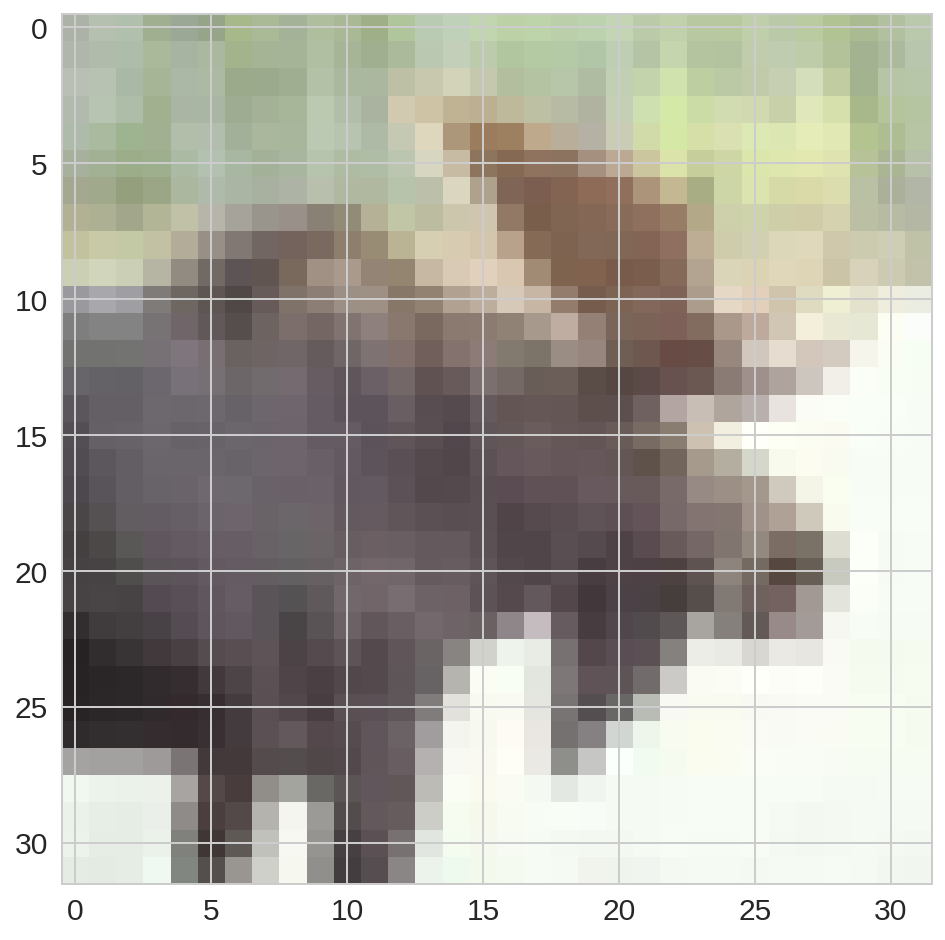

In [271]:
img = plt.imread(f"{PATH}test/deer/8126_deer.png")
plt.imshow(img);

In [272]:
img.shape

(32, 32, 3)

In [0]:
import torch.utils.data as data
import torchvision.datasets as datasets
import os

traindir = PATH + "train"
testdir = PATH + "test"

train_loader = data.DataLoader(
        datasets.ImageFolder(traindir,
                             transforms.Compose([
                                 transforms.ToTensor()
                             ])),
        batch_size=64,
        shuffle=True,
        pin_memory=True)

test_loader = data.DataLoader(
        datasets.ImageFolder(testdir,
                        transforms.Compose([
                            transforms.ToTensor()
                        ])),
        batch_size=64,
        shuffle=False,
        pin_memory=False)

In [274]:
len(train_loader.dataset.imgs)

50000

In [275]:
len(test_loader.dataset.imgs)

10000

In [0]:
batch = next(iter(train_loader))

In [0]:
X, y = batch

In [278]:
X[0].shape

torch.Size([3, 32, 32])

In [0]:
def show_image(tensor_data):
  im = tensor_data.numpy()
  im = np.transpose(im, (1,2,0))
  plt.imshow(im)
  plt.show()

In [280]:
y[0]

7

In [0]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5, padding=2)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, padding=2)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64*4*4, 100)
        self.fc1_drop = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(100, 10)

    def forward(self, x):
        c1 = self.conv1(x)
        x = F.relu(self.pool1(c1))
        c2 = self.conv2(x)
        x = F.relu(self.pool2(c2))  
        c3 = self.conv3(x)
        x = F.relu(self.pool3(c3))     
        x = x.view(-1, 64*4*4)
        x = self.fc1(x)
        x = self.fc1_drop(x)
        x = self.fc2(x)
        return x

In [0]:
model = CNN()

if torch.cuda.is_available():
    model = model.cuda()

criterion = nn.CrossEntropyLoss()

if torch.cuda.is_available():
    criterion = criterion.cuda()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [283]:
train_loss = []
test_loss = []


for epoch in range(EPOCHS_TO_TRAIN):
    model.train()
    e_train_loss = []
    for data, target in train_loader:
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        data, target = Variable(data), Variable(target)
        
        optimizer.zero_grad()

        y_pred = model(data)

        loss = criterion(y_pred, target)
        e_train_loss.append(loss.data[0])
        
        loss.backward()
        optimizer.step()
        
    mean_train_loss = np.mean(e_train_loss)
    train_loss.append(mean_train_loss)
        
    model.eval()
    e_test_loss = []
    correct = 0
    for data, target in test_loader:
        data, target = Variable(data, volatile=True), Variable(target, volatile=True)
        
        if torch.cuda.is_available():
            data = data.cuda()
            target = target.cuda()
        
        output = model(data)
        

        
        loss = criterion(output, target).data[0]
        e_test_loss.append(loss)
        
        pred = output.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()
    
    mean_test_loss = np.mean(e_test_loss)
    test_loss.append(mean_test_loss)
    
    print(f"""
    ######### Epoch {epoch + 1} #########\n
    Average train loss: {mean_train_loss}
    Average test loss: {mean_test_loss}
    Test accuracy: {correct}/{len(test_loader.dataset)} {100. * correct / len(test_loader.dataset)}%
""")



    ######### Epoch 1 #########

    Average train loss: 1.5662125239286886
    Average test loss: 1.2396284402555722
    Test accuracy: 5487/10000 54.87%


    ######### Epoch 2 #########

    Average train loss: 1.174583071409284
    Average test loss: 1.077455857566967
    Test accuracy: 6213/10000 62.13%


    ######### Epoch 3 #########

    Average train loss: 1.014200896024704
    Average test loss: 0.9617031586777632
    Test accuracy: 6585/10000 65.85%


    ######### Epoch 4 #########

    Average train loss: 0.9095519626003397
    Average test loss: 0.9265134721804577
    Test accuracy: 6736/10000 67.36%


    ######### Epoch 5 #########

    Average train loss: 0.8290822425156908
    Average test loss: 0.9164847946091063
    Test accuracy: 6848/10000 68.48%


    ######### Epoch 6 #########

    Average train loss: 0.7676109229512227
    Average test loss: 0.8623316424667455
    Test accuracy: 7022/10000 70.22%


    ######### Epoch 7 #########

    Average train loss: 0.7

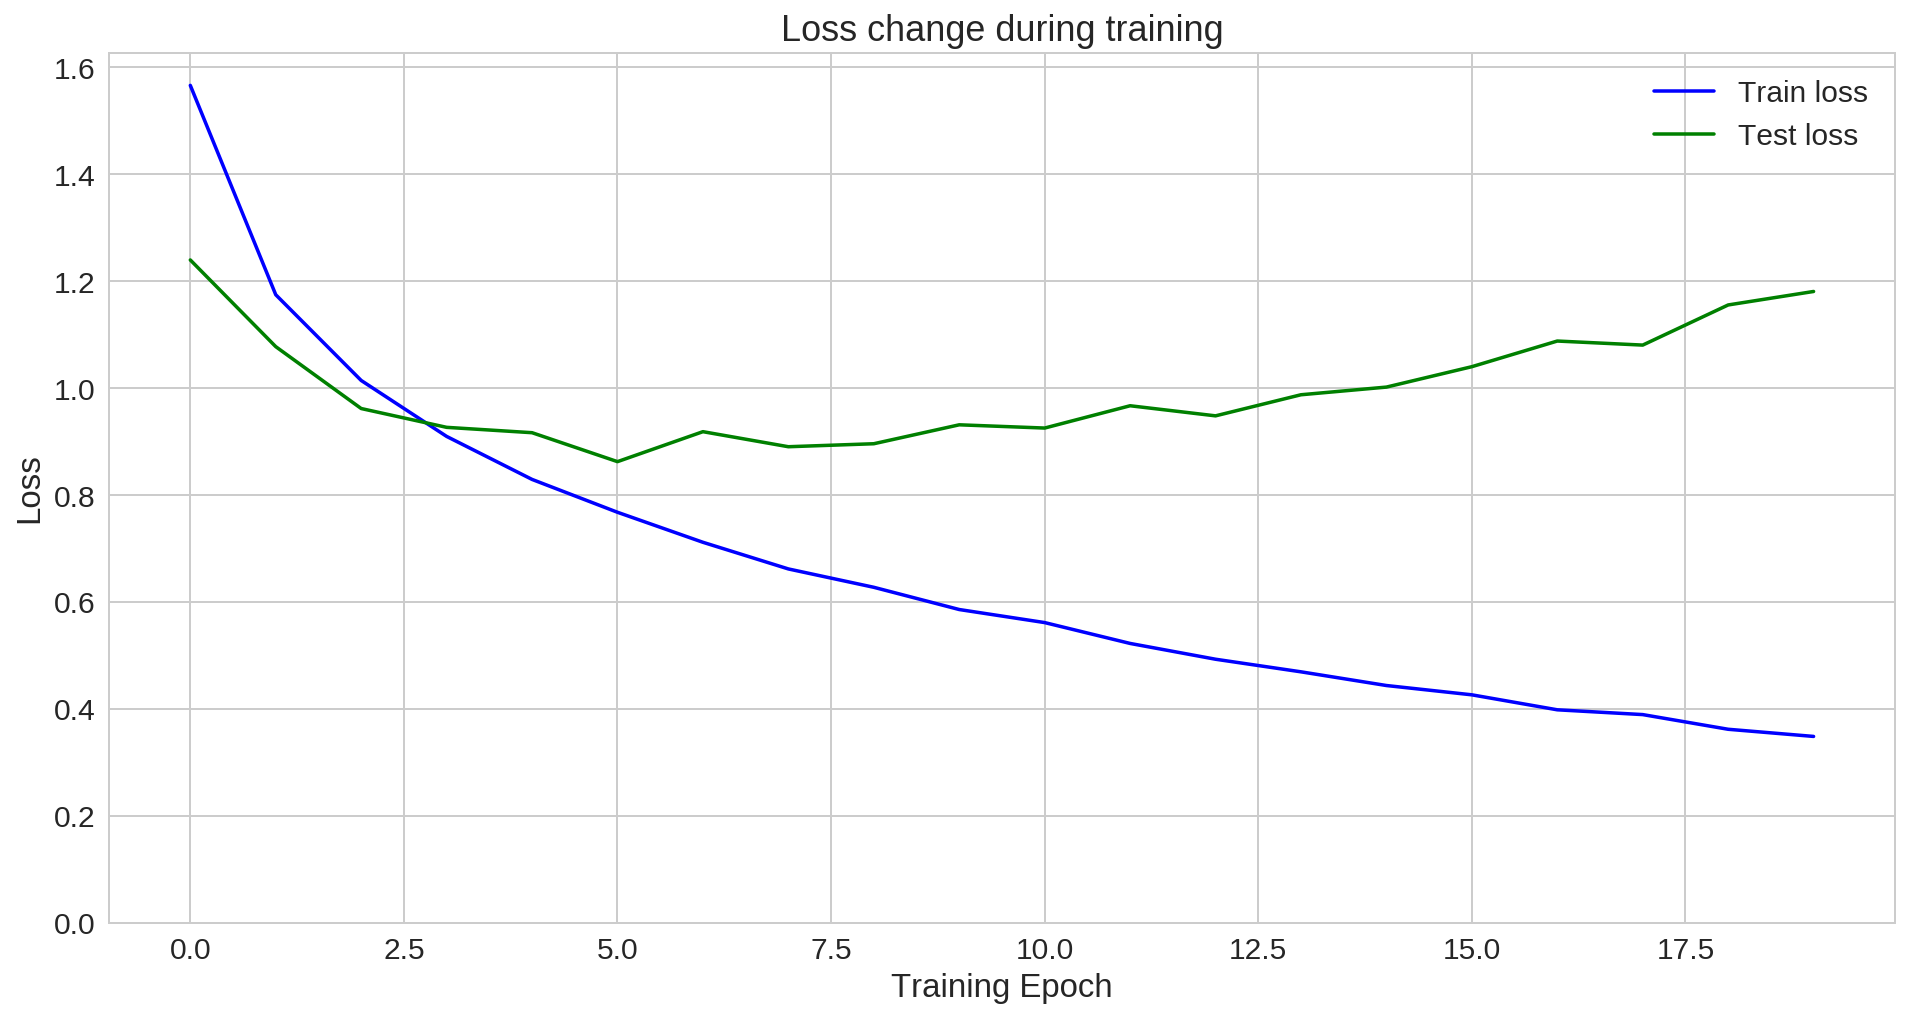

In [284]:
plt.figure(figsize=(16, 8))

plt.plot(train_loss, "b", label="Train loss")

plt.plot(test_loss, "g", label="Test loss")

plt.title("Loss change during training")
plt.legend(loc="upper right", shadow=True)
plt.ylabel("Loss")
plt.xlabel("Training Epoch")
plt.ylim(0)

plt.show()

In [0]:
model.eval()

ys = []
y_hats = []

for data, target in test_loader:
    data= Variable(data, volatile=True)
    
    if torch.cuda.is_available():
        data = data.cuda()
    
    output = model(data)

    pred = output.data.max(1, keepdim=True)[1]
    
    if torch.cuda.is_available():
        pred = pred.cpu()
    
    pred = pred.numpy().flatten()
    
    y_hats.extend(pred)
    ys.extend(target)

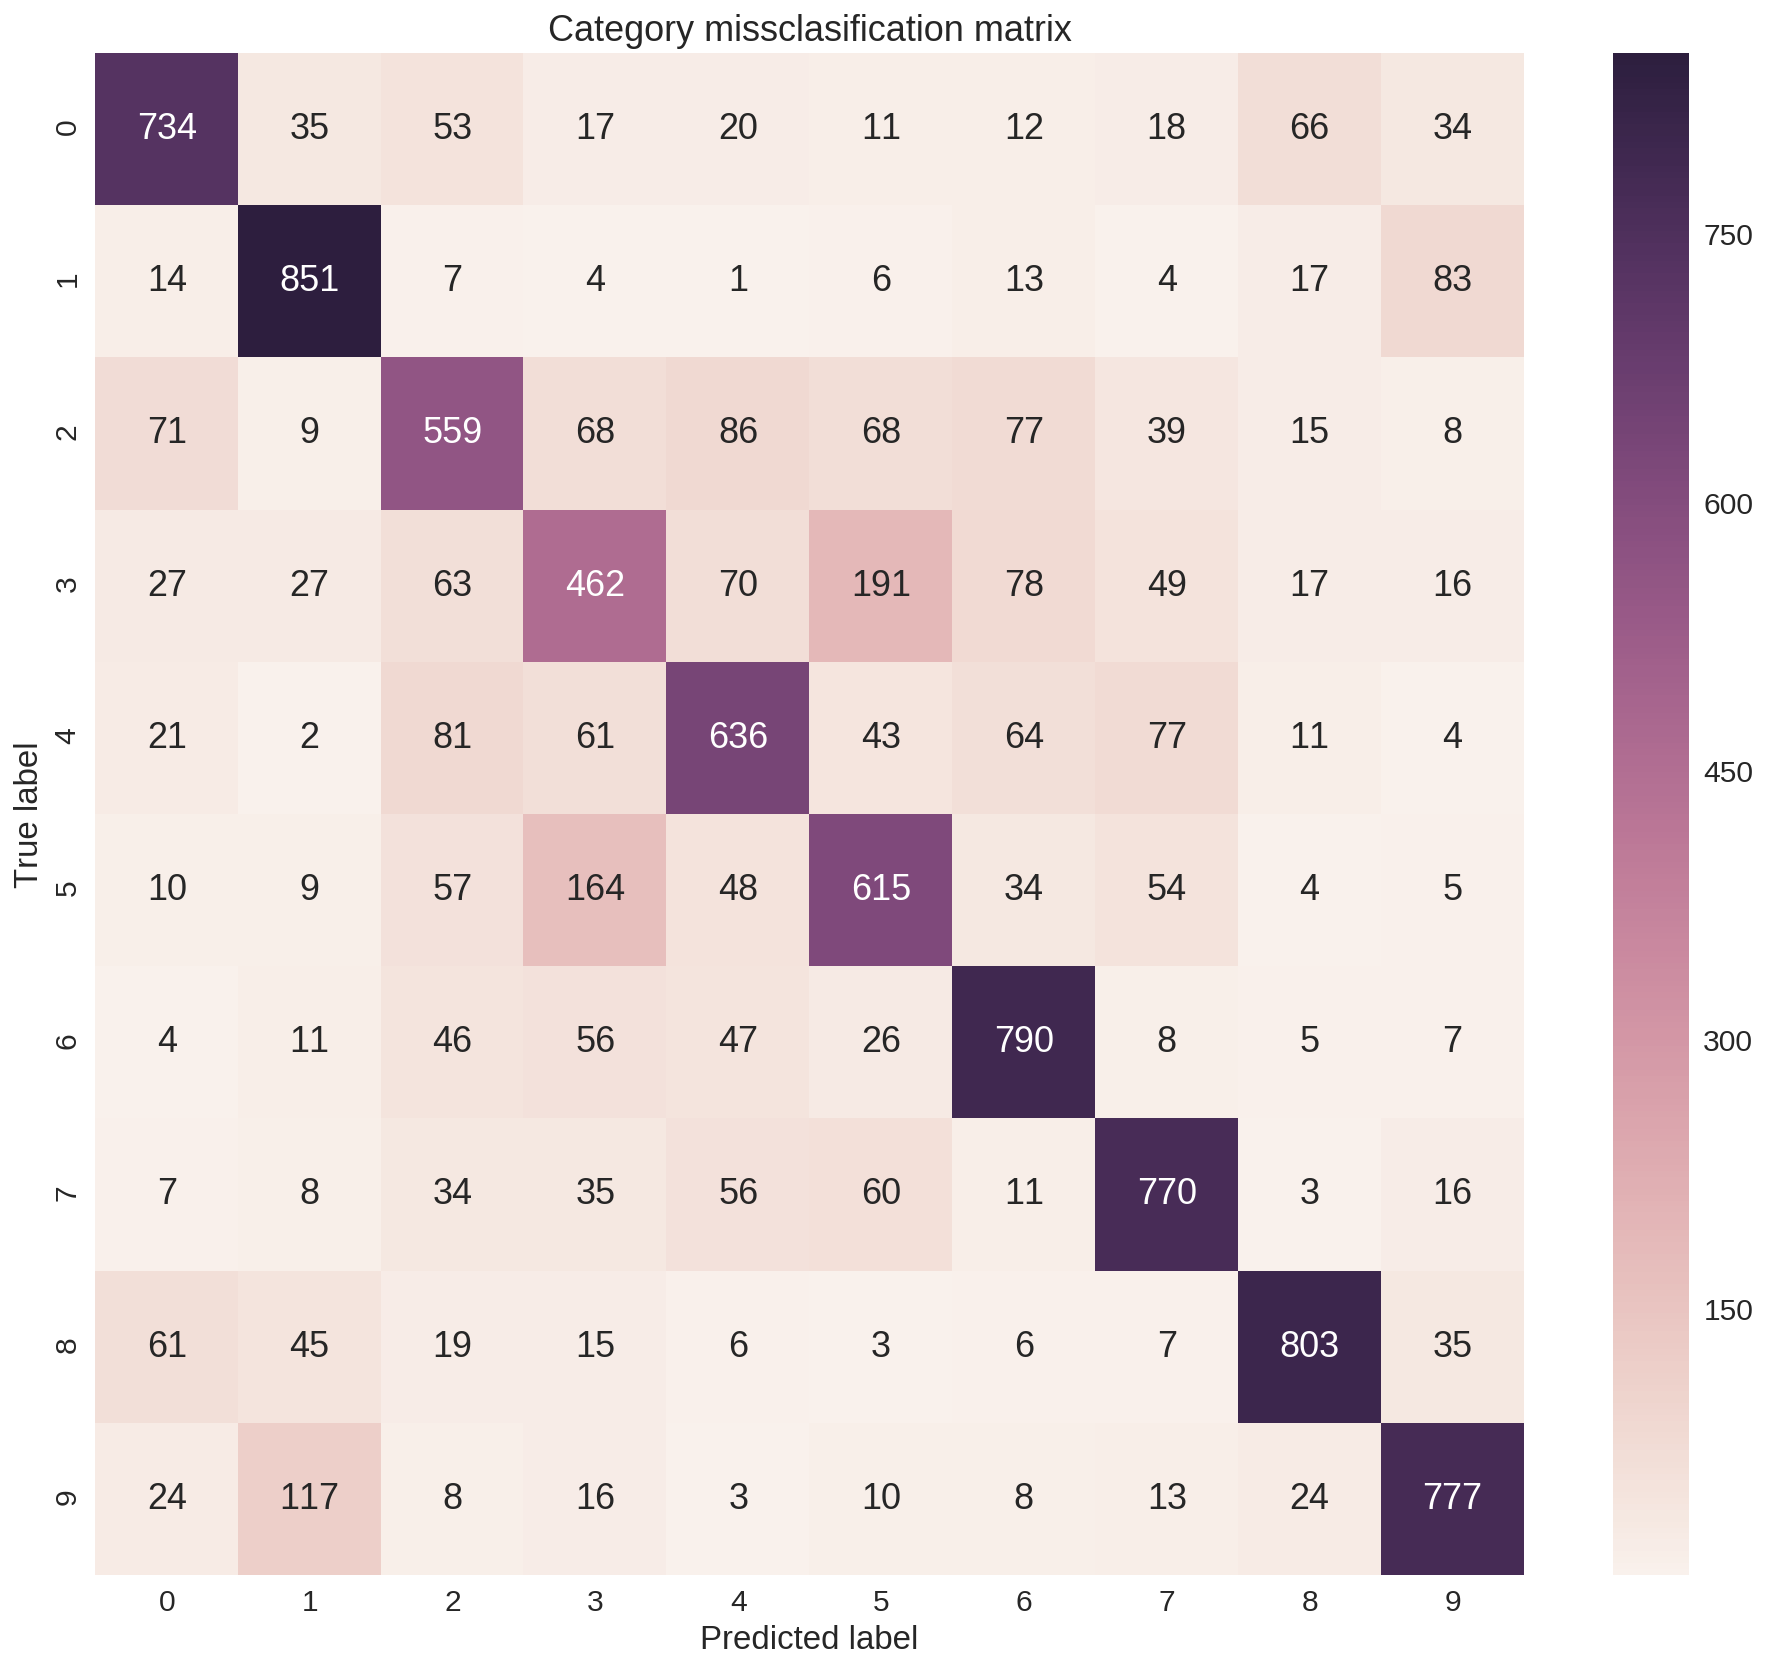

In [286]:
confusion_matrix = metrics.confusion_matrix(ys, y_hats)

plt.figure(figsize=(16, 14))
sns.heatmap(confusion_matrix, annot=True, fmt="d")
plt.title("Category missclasification matrix")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.show();